In [175]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import scipy.stats as stats
import numpy as np
import scipy.integrate as integrate
import matplotlib as mpl
import matplotlib.pyplot as plt
from cycler import cycler
import scipy.interpolate
import matplotlib.ticker as mticker
from scipy.optimize import curve_fit
import math
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')

In [176]:
myColors = ["#009E73", "#0072B2", "#CC79A7", "#D55E00", "#56B4E9", "#F0E442", "#E69F00", "#000000"]
colors= ["white", myColors[4], myColors[1], myColors[0], myColors[5], myColors[6], myColors[3]]
myNodes = [0.0, 0.1, 0.2, 0.35, 0.5, 0.85, 1.0]
myCmap = mpl.colors.LinearSegmentedColormap.from_list("mycmap", list(zip(myNodes, colors)))

colorsLog= ["white",  myColors[4], myColors[1], myColors[6], myColors[3], myColors[3]]
myNodesLog = [0.0, 0.1 , 0.2, 0.36, 0.6, 1]
myCmapLog = mpl.colors.LinearSegmentedColormap.from_list("mycmapLog", list(zip(myNodesLog, colorsLog)))

In [177]:
SMALL_SIZE = 10
MEDIUM_SIZE = 12
BIGGER_SIZE = 15

mpl.rcParams['agg.path.chunksize'] = 10000
plt.rcParams.update({
	'font.family':'serif',
	'mathtext.fontset' : 'cm',
	'mathtext.rm': 'serif',
	'font.weight': 'normal',
	})
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE) 
plt.rcParams.update({'font.size': 15})

mpl.rcParams['axes.prop_cycle'] = cycler(color=myColors)

In [178]:
x_0 = 9.67e-3
rho, xi, delta, eta = 3/4, 1, 3/4, 0

gen = np.random.default_rng()
n_samples = 2000

In [179]:
def Cross_Section(x, rho=rho, eta=eta):
    return x**2 * (1/2 * (3 - 3 * x) + 2/3 * rho * (4 * x - 3) + 3 * eta * x_0 * (1 - x)/x)

In [286]:
def x_generator(ninput, rho=rho, eta=eta):
    xcut=1
    fmax=Cross_Section(1)+0.02*Cross_Section(1)
    x_output=list(range(ninput))
    ii=0

    rx = gen.uniform(0, xcut, size = ninput)
    ry = gen.uniform(0, fmax, size = ninput)

    x_accepted_index = ry < Cross_Section(rx)
    x_output=rx[x_accepted_index]
            
    return x_output

In [291]:
ntest=10000
x_dataset = x_generator(ntest)

In [288]:
def Normalization(x_min, x_max):
    N = integrate.quad(Cross_Section, x_min, x_max, args=(rho, eta))[0]
    return N

In [289]:
x_min=0
x_max=1
#Test if CS is normalized
N=Normalization(x_min, x_max)

def CS_N(x):
    return Cross_Section(x)/N

(array([0.02275244, 0.        , 0.        , 0.        , 0.09100976,
        0.        , 0.04550488, 0.02275244, 0.09100976, 0.06825732,
        0.09100976, 0.18201953, 0.22752441, 0.13651464, 0.04550488,
        0.13651464, 0.27302929, 0.34128661, 0.36403905, 0.54605858,
        0.34128661, 0.45504881, 0.5005537 , 0.56881102, 0.65982078,
        0.79633543, 0.65982078, 0.77358298, 0.79633543, 1.04661227,
        1.00110739, 1.342394  , 0.91009763, 1.70643305, 1.31964156,
        1.79744282, 1.7291855 , 1.70643305, 2.38900628, 2.04771967,
        1.86570014, 2.5710258 , 2.16148187, 2.5710258 , 2.91231241,
        3.5721332 , 3.20809414, 3.36736123, 4.3002113 , 3.75415272]),
 array([0.09920796, 0.1172208 , 0.13523364, 0.15324648, 0.17125932,
        0.18927216, 0.207285  , 0.22529784, 0.24331068, 0.26132352,
        0.27933635, 0.29734919, 0.31536203, 0.33337487, 0.35138771,
        0.36940055, 0.38741339, 0.40542623, 0.42343907, 0.44145191,
        0.45946475, 0.47747759, 0.49549043, 0.

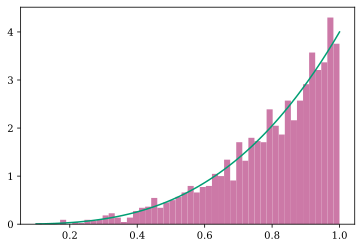

In [292]:
x_fit = np.linspace(0.1, 1, 50)
plt.plot(x_fit, CS_N(x_fit))
plt.hist(x_dataset, density=True, bins=50, color=myColors[2])

In [293]:
#1-b
mean = np.mean(x_dataset)
print(mean, 'similar to 4/5')

0.8005783781027304 similar to 4/5


In [186]:
#1-c
from scipy.stats import skew
from scipy.stats import kurtosis

s = skew(x_dataset)
k = kurtosis(x_dataset)
print(s, k)

-1.0114202168722295 0.5397386255794054


In [204]:
#2-a
N_exp=1

E = integrate.quad(lambda x: x*CS_N(x), x_min, x_max)[0]

ntest=np.around(np.logspace(1,5, 10))

mean_x_LOLN = np.empty(len(ntest))

for j in range(len(ntest)):
    x_dataset = x_generator(int(ntest[j]))
    mean_x_LOLN[j] = np.mean(x_dataset)

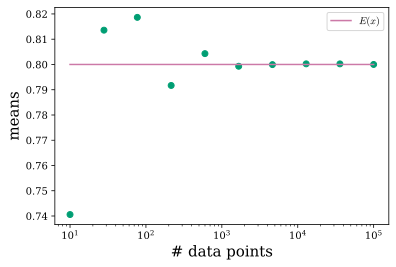

In [205]:
plt.scatter(ntest, mean_x_LOLN)
plt.xlabel('# data points')
plt.ylabel('means')
plt.plot(ntest, ntest/ntest*E, color = myColors[2], label='$E(x)$')
plt.xscale('log')
plt.legend()

In [213]:
#2-b
N_exp = 1000
ntest = 100

mean_x_CLT = np.empty(N_exp)

for j in range(N_exp):
    x_dataset = x_generator(ntest)
    mean_x_CLT[j] = np.mean(x_dataset)




(array([ 1.,  1.,  0.,  1.,  0.,  0.,  1.,  2.,  2.,  4.,  6.,  5.,  6.,
         7., 10., 11., 22., 22., 20., 16., 24., 34., 48., 49., 50., 41.,
        45., 51., 60., 58., 50., 54., 50., 43., 38., 33., 28., 22., 23.,
        19., 12.,  8.,  8.,  3.,  3.,  4.,  1.,  2.,  0.,  2.]),
 array([0.73960078, 0.74174068, 0.74388058, 0.74602047, 0.74816037,
        0.75030027, 0.75244016, 0.75458006, 0.75671996, 0.75885985,
        0.76099975, 0.76313965, 0.76527954, 0.76741944, 0.76955934,
        0.77169923, 0.77383913, 0.77597903, 0.77811892, 0.78025882,
        0.78239872, 0.78453861, 0.78667851, 0.78881841, 0.7909583 ,
        0.7930982 , 0.7952381 , 0.79737799, 0.79951789, 0.80165779,
        0.80379768, 0.80593758, 0.80807747, 0.81021737, 0.81235727,
        0.81449716, 0.81663706, 0.81877696, 0.82091685, 0.82305675,
        0.82519665, 0.82733654, 0.82947644, 0.83161634, 0.83375623,
        0.83589613, 0.83803603, 0.84017592, 0.84231582, 0.84445572,
        0.84659561]),
 <a list of 50

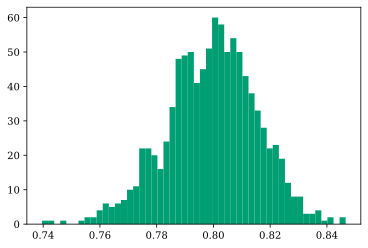

In [214]:
plt.hist(mean_x_CLT, bins=50)

In [215]:
#3-a
ntest=10000
x_dataset = x_generator(ntest)

(array([0.00558251, 0.01116502, 0.01116502, 0.01116502, 0.03349506,
        0.0614076 , 0.05582509, 0.08373764, 0.08932015, 0.10048517,
        0.0614076 , 0.1172327 , 0.08932015, 0.21771787, 0.19538783,
        0.27912547, 0.22888289, 0.27912547, 0.31820304, 0.36844562,
        0.3572806 , 0.54150341, 0.51359087, 0.64757109, 0.56941596,
        0.69223117, 0.85412394, 0.79271634, 0.95460911, 1.16674447,
        0.94344409, 1.03834675, 1.33980226, 1.39562735, 1.44586994,
        1.52960758, 1.93713077, 1.83106309, 1.99295586, 1.99853837,
        2.42280909, 2.33907145, 2.64610946, 2.69635205, 2.79683722,
        3.15970033, 3.54489348, 3.35508816, 3.90217408, 3.80168891]),
 array([0.10423276, 0.12214585, 0.14005894, 0.15797203, 0.17588512,
        0.19379821, 0.2117113 , 0.2296244 , 0.24753749, 0.26545058,
        0.28336367, 0.30127676, 0.31918985, 0.33710294, 0.35501603,
        0.37292912, 0.39084222, 0.40875531, 0.4266684 , 0.44458149,
        0.46249458, 0.48040767, 0.49832076, 0.

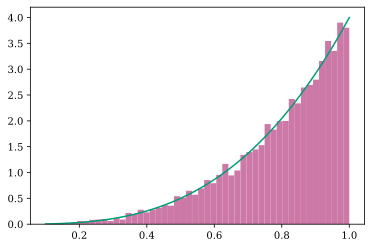

In [216]:
plt.plot(x_fit, CS_N(x_fit))
plt.hist(x_dataset, density=True, bins=50, color=myColors[2])

In [193]:
#3-b

In [194]:
#3-c

In [276]:
#4-a
def LLH(xtest,rhotest=rho, etatest=eta):
    Loutput=0
    for i in range(0,len(xtest)):
        Loutput+=math.log(Cross_Section(xtest[i],rho=rhotest, eta=etatest))
    return -Loutput

In [280]:
npar=400
x=x_generator(npar, rho, eta)     

In [294]:
x[96]

0.9425911382312021

In [284]:
nL = 101

rho_estimate=np.linspace(0.5, 0.8, nL)
eta_estimate=np.linspace(-0.1, 1, nL)

L_rho = list(range(nL))
L_eta = list(range(nL))

for i in range(0,nL):
    print(i)
    L_rho[i] = LLH(x, rhotest=rho_estimate[i])
    L_eta[i] = LLH(x, etatest=eta_estimate[i])

imin_rho=L_rho.index(min(L_rho))
imin_eta=L_eta.index(min(L_eta))

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97


ValueError: math domain error

In [279]:
print (rho_estimate[imin_rho])
print (eta_estimate[imin_eta])

0.7100000000000001
1.0


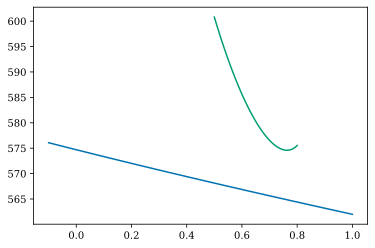

In [274]:
plt.plot(rho_estimate, L_rho)
plt.plot(eta_estimate, L_eta)